In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#read in csv
alaska = pd.read_csv('../datasets/alaska_single_engine_clean.csv')
pd.set_option('display.max_columns', None)
alaska

,NtsbNo,EventType,Mkey,City,N,HasSafetyRec,ReportType,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,ProbableCause,Latitude,Longitude,Make,Model,AirCraftCategory,AirportID,AirportName,AmateurBuilt,Scheduled,PurposeOfFlight,FAR,AirCraftDamage,WeatherCondition,Operator,EventYear,EventMonth,EventDay,EventTime,EventSeason
0,ANC23LA086,ACC,193153,Trimble River / Skwentna,N2586R,0,DirectorBrief,None Reported,0,0,0,Unknown,61.775160,-152.152630,CESSNA,182K,AIR,Unknown,Trimble River,0,Unknown,PERS,091,Substantial,Unknown,Unknown,2023,9,24,08:30:00,Fall
1,ANC23LA084,ACC,193128,Bethel,N8192D,0,DirectorBrief,None Reported,0,0,0,Unknown,60.805019,-161.786480,PIPER,PA-18-150,AIR,Unknown,Unknown,0,Unknown,PERS,091,Substantial,Unknown,Unknown,2023,9,20,12:00:00,Fall
2,ANC23LA080,ACC,193097,Homer,N7558H,0,DirectorBrief,None Reported,0,0,0,Unknown,59.646929,-151.493230,CESSNA,A185F,AIR,5BL,HOMER-BELUGA LAKE,0,Unknown,BUS,091,Substantial,VMC,Adventure Airways,2023,9,18,13:00:00,Fall
3,ANC23LA082,ACC,193105,Beaver Creek,N713C,0,DirectorBrief,None Reported,0,0,0,Unknown,64.267579,-147.687040,HELIO,H-295,AIR,Unknown,Unknown,0,NSCH,BUS,135,Substantial,Unknown,WRIGHT AIR SERVICE INC,2023,9,16,16:50:00,Fall
4,ANC23LA078,ACC,193088,NENANA,N907W,0,DirectorBrief,None Reported,0,0,0,Unknown,64.650753,-149.836390,RHODES STEVEN D,SR3500,AIR,Unknown,Unknown,1,Unknown,PERS,091,Substantial,VMC,Unknown,2023,9,16,15:00:00,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5654,ANC82DA014,ACC,69764,ANCHORAGE,N63516,0,DirectorBrief,Minor,0,0,1,Unknown,61.219909,-149.850982,CESSNA,150,AIR,MRI,MERRILL FIELD,0,Unknown,INST,091,Destroyed,VMC,"AERO TECH FLIGHT SERVICE, WC",1982,1,17,10:12:00,Winter
5655,ANC82DA015,ACC,71905,NEAR NUIQSUT,N1459T,0,DirectorBrief,None Reported,0,0,0,Unknown,71.280578,-156.779296,de Havilland,DHC-2-MK3,AIR,Unknown,Unknown,0,NSCH,UNK,135,Substantial,VMC,"SEA AIRMOTIVE, INC.",1982,1,15,17:00:00,Winter
5656,ANC82DA013,ACC,72330,QUINHAGAK,N756YN,0,DirectorBrief,Minor,0,0,3,Unknown,59.740913,-161.889205,CESSNA,U206,AIR,Unknown,Unknown,0,NSCH,UNK,135,Substantial,VMC,TRI-CITY AIR SERVICE,1982,1,10,17:55:00,Winter
5657,ANC82FA012,ACC,69937,BETHEL,N3343S,0,DirectorBrief,Serious,0,2,0,Unknown,60.809120,-161.849258,CESSNA,A185F,AIR,BET,BETHEL,0,NSCH,UNK,135,Substantial,VMC,EXECUTIVE CHARTER SERVICE,1982,1,5,09:39:00,Winter


# Exploratory Data Analysis

In [15]:
alaska.describe()

,Mkey,HasSafetyRec,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,Latitude,Longitude,AmateurBuilt,EventYear,EventMonth,EventDay
count,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000,5659.000000
mean,40531.327973,0.006538,0.222654,0.145785,0.266832,54.774279,-134.400902,0.022796,1998.533486,6.803145,15.491430
std,39096.509117,0.080602,0.834000,0.960765,1.886918,19.470845,47.780484,0.149264,11.625143,2.666204,8.830744
min,2292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-176.630386,0.000000,1982.000000,1.000000,1.000000
25%,4573.500000,0.000000,0.000000,0.000000,0.000000,58.820467,-154.559685,0.000000,1989.000000,5.000000,8.000000
50%,43063.000000,0.000000,0.000000,0.000000,0.000000,61.160820,-149.850555,0.000000,1997.000000,7.000000,15.000000
75%,71288.000000,0.000000,0.000000,0.000000,0.000000,62.449898,-145.610732,0.000000,2007.000000,9.000000,23.000000
max,193153.000000,1.000000,18.000000,60.000000,96.000000,71.474441,0.000000,1.000000,2023.000000,12.000000,31.000000


C:\Users\sophi\AppData\Local\Temp\ipykernel_11168\661195369.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl_matrix = alaska.corr()


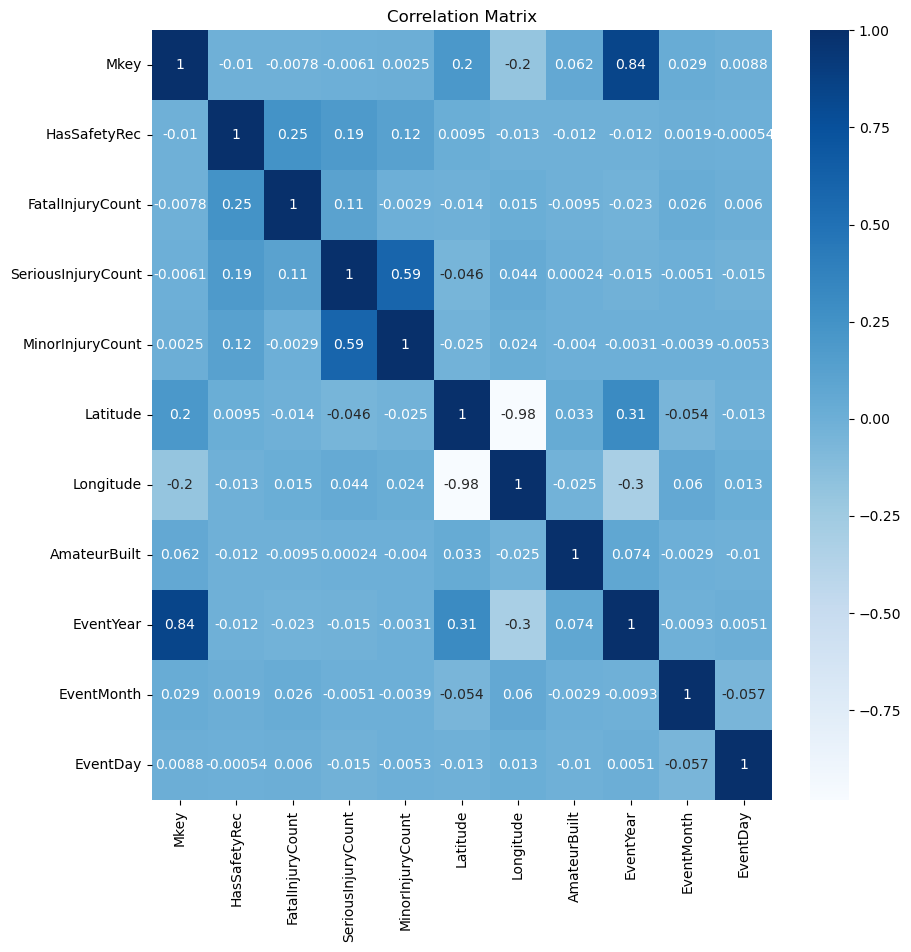

In [6]:
#correlation matrix to show the relationship between variables
correl_matrix = alaska.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correl_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

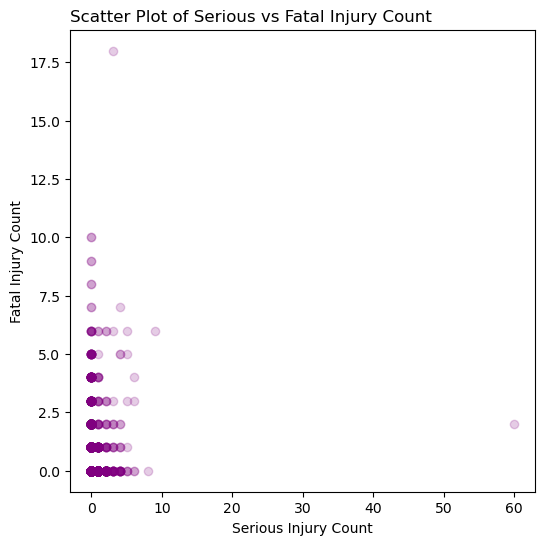

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(alaska['SeriousInjuryCount'], alaska['FatalInjuryCount'], alpha=0.2, color='purple')
plt.title('Scatter Plot of Serious vs Fatal Injury Count',loc='left')
plt.xlabel('Serious Injury Count')
plt.ylabel('Fatal Injury Count')
plt.show()

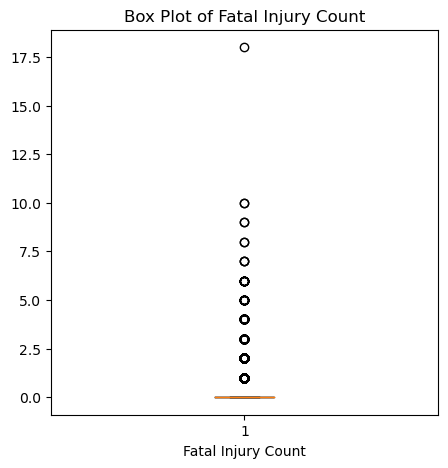

In [32]:
plt.figure(figsize=(5,5))
plt.boxplot(alaska['FatalInjuryCount'])
plt.title('Box Plot of Fatal Injury Count')
plt.xlabel('Fatal Injury Count')
plt.show()

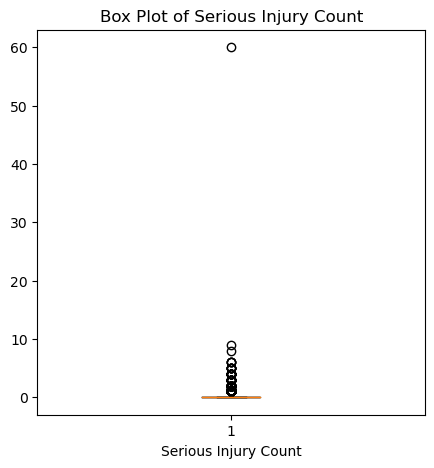

In [31]:
plt.figure(figsize=(5,5))
plt.boxplot(alaska['SeriousInjuryCount'])
plt.title('Box Plot of Serious Injury Count')
plt.xlabel('Serious Injury Count')
plt.show()

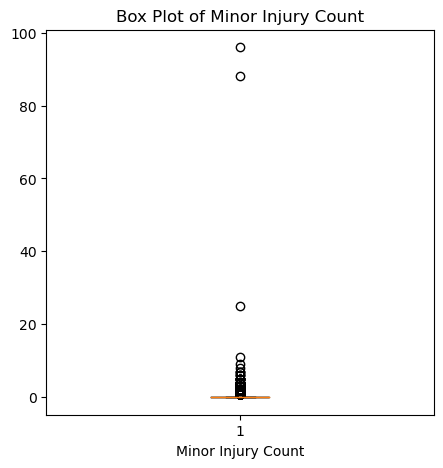

In [33]:
plt.figure(figsize=(5,5))
plt.boxplot(alaska['MinorInjuryCount'])
plt.title('Box Plot of Minor Injury Count')
plt.xlabel('Minor Injury Count')
plt.show()